In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
sns.set_palette("Set2")
sns.set_style("whitegrid")

In [9]:
df = pd.read_csv("results/results_operators.csv")

In [10]:
# Convert string representation of dictionary to actual dictionary
df['configuration'] = df['configuration'].apply(ast.literal_eval)

# Split the 'configuration' column into multiple columns
df_split = pd.json_normalize(df['configuration'])

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, df_split], axis=1)

# Drop the original 'configuration' column
df = df.drop('configuration', axis=1)
df = df.drop('Unnamed: 0', axis=1)

df.head()

,fitness_instance_1,time_instance_1,fitness_instance_2,time_instance_2,fitness_instance_3,time_instance_3,fitness_instance_4,time_instance_4,fitness_instance_5,time_instance_5,...,rank_instance_5,rank_instance_6,rank_instance_7,rank_instance_8,average_rank,median_rank,mutation_operator,crossover_operator,selection_method,population_replacement_strategy
0,46.666667,0.071425,60.000000,0.085265,2193.666667,0.587291,2379.333333,0.561128,78711.333333,7.178454,...,8,10,11,3,13.250,10.5,mixed,cut_and_crossfill,roulette_wheel,lambda_mu
1,46.000000,0.171287,56.333333,0.180344,2334.000000,18.952597,2345.333333,1.212451,78962.666667,80.554779,...,11,3,6,11,14.625,9.5,mixed,cut_and_crossfill,uniform,lambda_mu
2,47.000000,0.101575,55.666667,0.096241,2216.333333,0.814155,2388.333333,1.084120,76368.333333,11.817063,...,2,14,14,30,14.750,14.0,swap,pmx,uniform,lambda_mu
3,50.000000,0.078543,56.000000,0.094164,2313.333333,0.588371,2439.666667,0.711784,77253.000000,8.142685,...,4,8,9,6,18.875,8.5,mixed,cut_and_crossfill,linear_ranking,lambda_mu
4,47.333333,0.061574,63.333333,0.087211,2275.333333,0.550383,2415.000000,0.484609,78547.000000,6.690231,...,7,13,2,2,19.500,13.0,mixed,cut_and_crossfill,exponential_ranking,lambda_mu


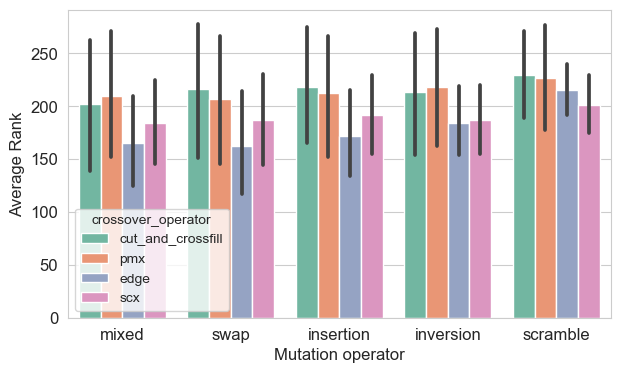

In [11]:
# You can adjust the figsize parameter to change the dimensions
plt.figure(figsize=(7, 4))

# Create the bar plot
ax = sns.barplot(data=df, x="mutation_operator", y="average_rank", hue="crossover_operator")

ax.set_xlabel('Mutation operator', fontsize=12)
ax.set_ylabel('Average Rank', fontsize=12)

# Increase font size for tick labels on both axes
ax.tick_params(axis='both', labelsize=12)

plt.savefig("figures/mutation_operators_comparison.png", bbox_inches='tight')
# Show the plot
plt.show()

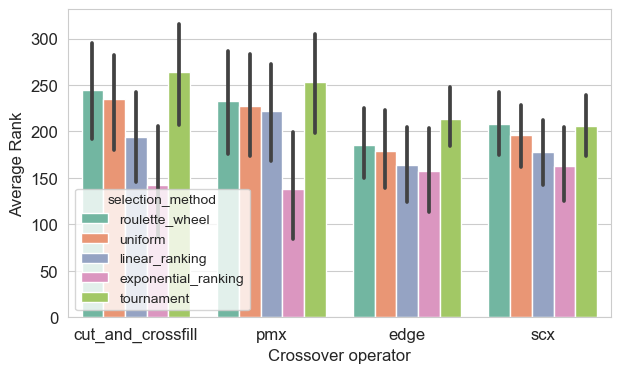

In [12]:
# You can adjust the figsize parameter to change the dimensions
plt.figure(figsize=(7, 4))

# Create the bar plot
ax = sns.barplot(data=df, x="crossover_operator", y="average_rank", hue="selection_method")

ax.set_xlabel('Crossover operator', fontsize=12)
ax.set_ylabel('Average Rank', fontsize=12)

# Increase font size for tick labels on both axes
ax.tick_params(axis='both', labelsize=12)

plt.savefig("figures/crossover_operators_comparison.png", bbox_inches='tight')
# Show the plot
plt.show()

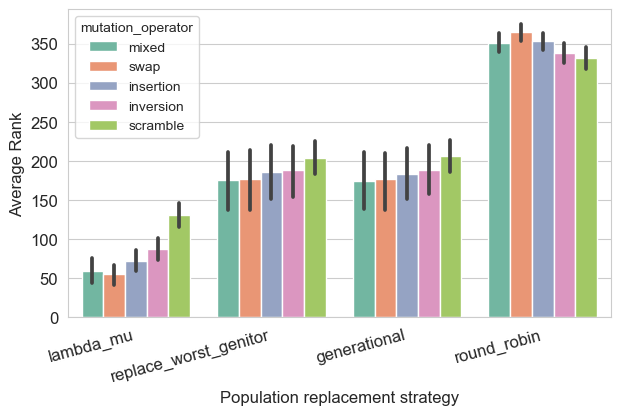

In [13]:
# You can adjust the figsize parameter to change the dimensions
plt.figure(figsize=(7, 4))

# Create the bar plot
ax = sns.barplot(data=df, x="population_replacement_strategy", y="average_rank", hue="mutation_operator")

ax.set_xlabel('Population replacement strategy', fontsize=12)
ax.set_ylabel('Average Rank', fontsize=12)

# Increase font size for tick labels on both axes
ax.tick_params(axis='both', labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')

plt.savefig("figures/population_replacement_comparison.png", bbox_inches='tight')
# Show the plot
plt.show()

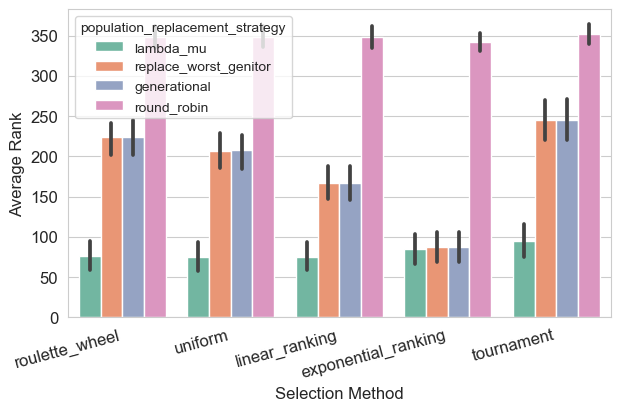

In [14]:
# You can adjust the figsize parameter to change the dimensions
plt.figure(figsize=(7, 4))

# Create the bar plot
ax = sns.barplot(data=df, x="selection_method", y="average_rank", hue="population_replacement_strategy")

ax.set_xlabel('Selection Method', fontsize=12)
ax.set_ylabel('Average Rank', fontsize=12)

# Increase font size for tick labels on both axes
ax.tick_params(axis='both', labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')

plt.savefig("figures/selection_methods_comparison.png", bbox_inches='tight')
# Show the plot
plt.show()